In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data file
df=pd.read_csv('updated_data.csv')
df.head()

,Gender,bodyFrame_Breadth,skin_Nature,skin_Color,weight_Changes,nails_color,teeth_Color,teeth_Shape,recalling_speed,memorizing_speed,...,appetite_Frequency,bladder_Frequency,perspiration_Amount,stool_Consistency,mental_Power,physical_Power,Anger_Freq,Irritability_speed,speech_Argumentative,class
0,Male,Thin/Narrow,Dry,Whitish,Gainandloseeasily,Pink,MilkyWhite,Regular,Moderately,Moderately,...,Regular,Regular,Medium,Medium,Grade1,Grade2,Good,Quickly,Non_Argumentative,Vata
1,Male,Broad,Normal,Whitish,Gainandloseeasily,Reddish,MilkyWhite,Regular,Moderately,Moderately,...,Regular,Regular,Medium,Medium,Grade2,Grade3,Poor,Slowly,Non_Argumentative,Kapha
2,Male,Thin/Narrow,Dry,Whitish,Difficultyingaining,Pink,Yellowish,Irregular,Slowly,Moderately,...,Irregular,Regular,Medium,Hard,Grade1,Grade2,Poor,Moderately,Non_Argumentative,Vata
3,Male,Thin/Narrow,Dry,FairPaleYellow,Difficultyingaining,Pink,Dull/Blackish,Regular,Variably,Quickly,...,Irregular,Regular,Medium,Hard,Grade1,Grade1,Medium,Quickly,Non_Argumentative,Vata
4,Male,Broad,Normal,Dark,Gaineasilyandlosewithdifficulty,Pink,MilkyWhite,Regular,Moderately,Slowly,...,Regular,Regular,Medium,Medium,Grade2,Grade3,Good,Moderately,Non_Argumentative,Kapha


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data = df.apply(le.fit_transform)

data.head()

,Gender,bodyFrame_Breadth,skin_Nature,skin_Color,weight_Changes,nails_color,teeth_Color,teeth_Shape,recalling_speed,memorizing_speed,...,appetite_Frequency,bladder_Frequency,perspiration_Amount,stool_Consistency,mental_Power,physical_Power,Anger_Freq,Irritability_speed,speech_Argumentative,class
0,1,2,0,4,1,1,1,1,0,0,...,1,1,2,2,0,1,0,1,1,2
1,1,0,1,4,1,2,1,1,0,0,...,1,1,2,2,1,2,2,2,1,0
2,1,2,0,4,0,1,2,0,2,0,...,0,1,2,0,0,1,2,0,1,2
3,1,2,0,1,0,1,0,1,3,1,...,0,1,2,0,0,0,1,1,1,2
4,1,0,1,0,2,1,1,1,0,2,...,1,1,2,2,1,2,0,0,1,0


In [4]:
from sklearn.model_selection import train_test_split

X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

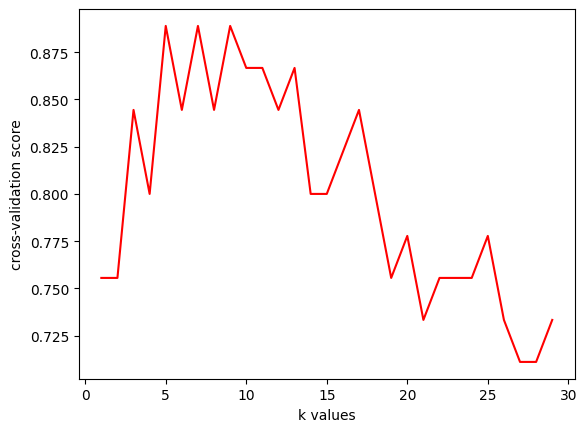

In [5]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

k_range=list(range(1,30))
k_scores=[]
for k in k_range:
    clf = neighbors.KNeighborsClassifier(k, weights='distance')
    clf.fit(X_train, y_train)
    scores=cross_val_score(clf, X_test, y_test, cv=5)
    k_scores.append(scores.mean())

plt.plot(k_range,k_scores,color="red")
plt.xlabel('k values')
plt.ylabel('cross-validation score')
plt.show()

In [10]:
from sklearn import neighbors

n_neighbors=8
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test)  
## See how the model performs on the test data.
clf.score(X_test, y_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.67      0.89      0.76         9
           2       0.95      0.82      0.88        22

    accuracy                           0.87        45
   macro avg       0.85      0.88      0.86        45
weighted avg       0.89      0.87      0.87        45



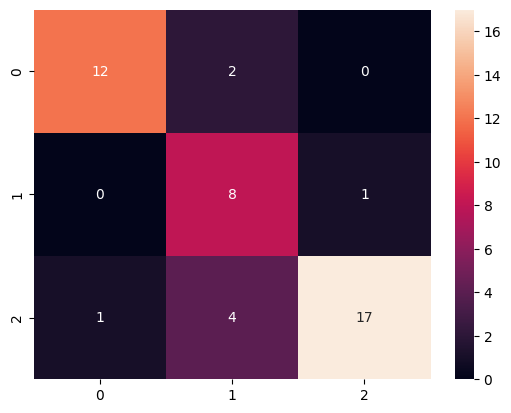

In [9]:
import seaborn as sn

cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True)
plt.show()